# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек  
Выполнил студент группы 9381 Матвеев Андрей, вариант 54

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.



## Основные теоретические положения
### Бинарный метод  
Один из методов быстрого возведения числа $x$ в степень $n \in N$. В методе степень записывается в двоичной системе счисления. Далее, самый левый (ненулевой) бит предварительно отсекается, после чего производится просмотр бит слева направо и над числом производится последовательность операций в зависимости от последовательности этих бит: 
- если бит равен нулю, то текущее  число возводится в квадрат;
- если бит равен единице, то текущее число возводится в квадрат и умножается на $x$.<br> 

Количество операций умножения в бинарном методе равно: $\lambda(n) + \nu(n) - 1$, где 
- $\lambda(n) = \lfloor log_2 n \rfloor$ - уменьшенная на 1 длина бинарной записи числа $n$;
- $\nu(n)$ - число ненулевых цифр в записи числа (количество единиц в бинарной записи числа).

### Метод множителей 
Один из методов быстрого возведения числа $x$ в степень $n \in N$. 
Рассматриваются 2 случая:
1) Если число составное: число $n$ раскладывается на произведение чисел: $n = i\cdot j$, причём $i$ - минимальный простой множитель числа. После этого вычисляется $x^{i}$, затем результат возводится в степень $j$.
2) Если число простое: вычисляется $x^{n-1}$ (причём $n-1$ раскладывается на произведение чисел аналогично предыдущему пункту), затем результат умножается на $x$.

Пусть $m$ - количество операций, необходимых, чтобы вычислить $x^{i}$, a $f$ - количество операций, чтобы возвести $x^{i}$ в степень $j$, тогда количество операций в методе множителей $m + f$.


### Определение аддитивной цепочки
Аддитивная цепочка для некоторого числа $n\in \mathbb{N}$ - это последовательность натуральных чисел $\{a_i\}_{i=0}^m$, принимающих значения от $1$ до $n$, в которой каждый элемент равен сумме каких-либо двух предыдущих. Свойства аддитивной цепочки:
1. $a_0 = 1,\dotso , a_m = n$;
2. $\forall i = 1\dotso m: a_i = a_j + a_k$, $k \leq j < i$;

$l(n)$ - минимальная длина аддитивной цепочки.

$\forall n \leq 1000$ справедлива рекурентная формула: $l(n) = min\{ l(n-1)+1, l_n\} - \delta_n$, где 
 $l_p = 
    \begin{cases} 
        \infty & \quad \text{, если p - простое число}  \\ 
        l(q) + l(\frac{p}{q}) & \quad \text{, если q - минимальный простой делитель числа p} 
     \end{cases}$
     
 $\delta_n\in\{0, 1\}$

### Типы шагов аддитивной цепочки

$a_i=a_j+a_k$ - шаг аддитивной цепочки, $i \in \{1,\dotso,m\}$, $0\leq k\leq j < i$

Типы шагов:
1) Удвоение, если $j=k=i-1$, то есть $a_i = 2 \cdot a_{i-1}$;<br>
2) Звёздный, если $j = i-1$, $k = \{0,1,\dotso,{i-1}$\};<br>
3) Малый, если $\lambda(a_i) = \lambda(a_{i-1})$

### Теорема Брауэра

При некотором $k < log_2 {log_2 n}$ верно неравенство: $l(n)<(1+k^{-1}) \cdot \lceil log_2 n \rceil + 2^{k-1}-k+2$

При $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$ верны следствия:
1. $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$
2. Наилучшая верхняя оценка для длины аддитивной цепочки: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$


### Звездная цепочка
Звездная цепочка - это аддитивная цепочка, которая содержит только звёздные шаги, т.е. $a_i=a_{i-1}+a_k$, где $0 \leq k \leq i-1$

### Гипотеза Шольца-Брауэра
Пусть $l^*(n)$ - длина некоторой звёздной цепочки, $l^*(n) \geq l(n)$<br>
Гипотеза Шольца-Брауэра: $l^*(2^n-1) \leq l(n)^*+n-1$



### Алгоритм Яо
Алгоритм Яо - алгоритм поиска аддитивной цепочки для некоторого числа $n \in N$.

Сначала представим число $n$ в виде следующей суммы: $n = \displaystyle\sum_{i = 0}^{j}a_j2^{ik}, a_j \neq 0, k \geq 2$.

Далее, введём функцию $d(z)=\displaystyle\sum_{\forall i: a_i=z} 2^{ik}$. 
Т.е. $d(z)$ - сумма чисел $ 2^{ik} $ для $  \forall i : a_i = z $ . 

1) Cначала в аддитивную цепочку Яо добавляются степени двойки до $ \lambda (n) $. Т.о. начало цепочки $Y_k(n):\{ 1,2,4,\dots ,2^{\lambda(n)} \}$; <br> 
2) Затем вычисляются все значения $d(z)$, где $z \in \{1,2,3, \dots ,2^k-1 \}$ и $d(z) \neq 0$;<br>

Число $n$ будет раскладываться в таком виде: $n=\displaystyle\sum_{z=1}^{2^k-1}z \cdot d(z)$.


### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов находит минимальную звездную цепочку для некоторого числа $n \in \mathbb{N}$. 

Пусть у дана звездная цепочка длины ${l(n) = m-1}$.
Тогда для каждой такой звездной цепочки можно задать вектор индексов вида ${\left \{ r_1, r_2, ..., r_{m-1} \right \} : r_i = \left\{x: 1 \leq x \leq i\right\}}$. Тогда можно записать шаг в виде ${a_i = a_{i-1} + a_{r_{i-1}}}$.

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - изменяющаяся часть.

Максимальное значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.

Минимальное значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.

Зная $a_{q+1}$ можно найти $a_{min}$ и $a_{max}$:

$a_{max} = a_{q+1} \cdot {2}^{m-q}$

$a_{min} = a_{q+1}+m-q$

Алгоритм дробления ВИ:
1. Длина минимальной звездной цепочки $l(n)$ будет находиться на отрезке $\underline{l}(n) \leq l(n) \leq \overline{l}(n)$, где $\underline{l}(n) = \lceil lb(n) \rceil$, а  $\overline{l}(n) = \lambda(n) + \nu(n) - 1$ , на каждой итерации выбираем $q$ ($1 \leq q \leq m-1$);
2. Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ ($q!$ вариантов), для каждой строим соответствующую ей звездную цепочку, находим $a_{max}$ и ${a}_{min}$, после чего:
 1. Если $a_m=n$, то цепочка найдена;
 2. Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ и находим $a_m$:
  1. Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
  2. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к новому вектору $\{r_i\}_{i=1}^q$;
3. Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1 и возвращаемся к пункту 2.

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$,где $n \geq 30$, для 2-3 значений $n$(значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Яо для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n \geq 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n \leq 10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. _Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность_


## Выполнение работы
1) Применить бинарный метод и метод множителей для xn, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

#### Бинарный метод и метод множителей

2


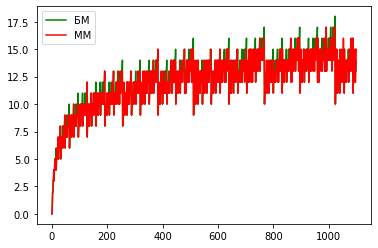

Число 3: БМ: 2 MM:2
Число 5: БМ: 3 MM:3
Число 9: БМ: 4 MM:4
Число 17: БМ: 5 MM:5
Число 33: БМ: 6 MM:7
Число 65: БМ: 7 MM:8
Число 129: БМ: 8 MM:10
Число 513: БМ: 10 MM:13
Число 1025: БМ: 11 MM:14


In [25]:
import matplotlib.pyplot as plt
def binary(num, power):
    tmp = power
    snum = num
    opers = []
    while tmp: # создаём список операций, которые надо провести с числом в обратном порядке
        if tmp % 2:
            opers.append('M')
            opers.append('S')
        else:
            opers.append('S')
        tmp //= 2
    opers.reverse() # разворачиваем его в другую сторону
    opers = opers[2:] # отсекаем уже в списке интерпретацию самой левой 1 - слог SM
    for i in opers:
        if i == 'S':
            num = num*num
        elif i == 'M':
            num = num*snum
    return [num, len(opers)]

def getMinSimpleDiv(power): # ищет минимальный простой делитель степени
    for i in range(2, power+1):
        if (power % i) == 0:
            return i
    return power

def multips(num, power): # реализация метода множителей
    if power == 0:
        return [1, 0]
    elif power == 1:
        return [num, 0]
    minSD = getMinSimpleDiv(power) # ищем мин. простой делитель степени
    #print(minSD)
    if minSD == power:
        res = multips(num, power-1) # если число простое, то рекурсивно вызовем для power - 1
        return [res[0]*num, res[1] + 1]
    secondD = power // minSD # ищем оставшийся делитель степени
    # x^n = (x^i)^j
    resBuf = binary(num, minSD)
    xi = resBuf[0]; 
    iopers = resBuf[1]
    #print(iopers)
    resBuf = binary(xi, secondD)
    xij = resBuf[0]; jopers = resBuf[1]
    #print(jopers)
    return [xij, iopers + jopers]

x = int(input())
resB = []
resM = []
deg = [int(i) for i in range(1100)]
for i in range(0, 1100):
    resB.append(int(binary(x, i)[1]))
    resM.append(int(multips(x, i)[1]))

plt.plot(deg, resB, color="green", label="БМ")
plt.plot(deg, resM, color="red", label="ММ")
plt.legend(loc = 'best')
plt.show()

special = [3, 5, 9, 17, 33, 65, 129, 513, 1025]
for i in special:
    print("Число {}: БМ: {} MM:{}".format(i, resB[i] ,resM[i]))

    

Приведённые выше алгоритмы дали следующие результаты для $n = 33, 38, 43, 63$

1) $n = 33$ <br>
Бинарный метод:
$33 = 100001_2$ <br>
$ x^{33} : x, x^2, x^4, x^8, x^{16}, x^{32}, x^{33} $ - 6 операций.

Метод множителей: $33 = 3 \cdot 11 $ <br>
$ x^{33}: (x^{3})^{11}; \quad 3 = 11_2, \quad 11 = 1011_2 $ <br>
$ x^{3}: x, x^{2}, x^{2} \cdot x = x^{3};$ - 2 операции; <br>
$x^{11}: x, x^{2}, x^{4}, x^{5}, x^{10}, x^{11}$ - 5 операций; <br>
$x^{3} \cdot x^{11} = x^{33} \quad 2 + 5 = 7$ операций необходимо.

2) $n = 38$ <br>
Бинарный метод:
$38 = 100110$ <br>
$ x^{38}: x, x^{2}, x^{4}, x^{8}, x^{9}, x^{18}, x^{19}, x^{38} $ - 7 операций.

Метод множителей: $38 = 2 \cdot 19 $ <br>
$ x^{38}: (x^{2})^{19}; \quad 2 = 10_2, \quad 19 = 10011_2 $ <br>
$ x^{2}: x, x^{2} $ - одна операция; <br>
$x^{19}: x, x^{2}, x^{4}, x^{8}, x^{9}, x^{18}, x^{19}$ - 6 операций; <br>
$x^{2} \cdot x^{19} = x^{38} \quad 1 + 6 = 7$ операций необходимо.

3)$n = 43$<br>
Бинарный метод:
$43 = 101011_2$ <br>
$ x^{43}: x, x^{2}, x^{4}, x^{5}, x^{10}, x^{20}, x^{21}, x^{42}, x^{43} $ - 8 операций.

Метод множителей: $43$ - простое число. $42 = 2 \cdot 21$ <br>
$ x^{43}: ((x^{2})^{21})\cdot x; \quad 2 = 10_2, \quad 21 = 10101_2 $ <br>
$ x^{2}: x, x^{2} $ - одна операция; <br>
$x^{21}: x, x^{2}, x^{4}, x^{5}, x^{10}, x^{20}, x^{21}$ - 6 операций; <br>
$x^{2} \cdot x^{21} = x^{42} \rightarrow x^{43} \quad 1 + 6 + 1 = 8$ операций необходимо.

4)$n = 63$<br>
Бинарный метод:
$63 = 111111_2$ <br>
$ x^{63}: x, x^{2}, x^{3}, x^{6}, x^{7}, x^{14}, x^{15}, x^{30}, x^{31}, x^{62}, x^{63} $ - 10 операций.

Метод множителей: $63 = 3 \cdot 21 $ <br>
$ x^{38}: (x^{3})^{21}; \quad 3 = 11_2, \quad 21 = 10101_2 $ <br>
$ x^{3}: x, x^{2}, x^{3} $ - 2 операции; <br>
$x^{21}: x, x^{2}, x^{4}, x^{5}, x^{10}, x^{20}, x^{21}$ - 6 операций; <br>
$x^{3} \cdot x^{21} = x^{63} \quad 2 + 6 = 8$ операций необходимо.


#### Вывод:
Проанализировав изменение количества операций для каждого метода, можно наблюдать, что при одних значениях  𝑛  более эффективен  метод множителей, при других - бинарный метод. Исходя из графика, чуть более оптимальным является метод множителей. Также было установлено,что при $n = 2^{k} + 1, k \in N$  , бинарный метод не превосходит по количеству операций метод множителей, то есть в числах такого вида метод множителей неэффективен.

2) Реализовать алгоритм Яо для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
#### Алгоритм Яо

Реализация алгоритма Яо для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k:

In [12]:
import math

def indent(n, text = ""):
    for i in range(n):
        print(" ", end='')
    print(text, end="")

def buildChainZDZ(z, dz): # вычисление z*d(z)
    indent(12);print("Построение цепочки для z*d(z). z = {}, d(z) = {}".format(z, dz))
    new_dz = [dz] #
    tmpDz = dz
    binZ = bin(z)[3:] # получаем двоичную запись числа z c отсечением самой левой единицы (как в бинарном методе)
    indent(16); print("Двоичная запись z без старшей 1 =", binZ)
    for i in binZ: # z*d(z) вычисляем аналогично бинарному методу, только вместо операции умножения выступает сложение
        if i == '0': # эквивалентно К
            tmpDz += tmpDz
            new_dz.append(tmpDz)
        elif i == '1': # эквивалентно КУ
            tmpDz += tmpDz
            new_dz.append(tmpDz)
            tmpDz += dz
            new_dz.append(tmpDz)
    indent(16); print("z*d(z)-цепочка:", new_dz)
    indent(12); print("Конец построения цепочки для z*d(z)")
    return new_dz # на выходе получаем цепочку получения z*d(z)



def Yao(n, k):
    modsArray = []
    temp = n
    div = 2 ** k
    while (temp > 0): # составляем массив остатков от деления числа n на 2^k
        modsArray.append(temp % div)
        temp //= div
    print("Массив остатков от деления {} на 2^{}".format(n, k), modsArray)
    resChain = []

    for i in range(int(math.log(n, 2)) + 1): # заполняем цепочку числами от 1 до 2^(lambda(n))
        resChain.append(2 ** i)
    print("Начало цепочки: ", resChain)
    res = 0
    print("Вычисление z*d(z):")
    for z in range(1, div): # для любого z из диапазона [1, ... , 2^k - 1]
        dz = 0
        for i in range(0, len(modsArray)):
            if modsArray[i] == z: # если нашелся остаток от деления на div, равный z
                indent(4); print("Остаток {} = z".format(modsArray[i]))
                indent(4); print("d(z) += 2^({}*{})".format(i,k))
                dz += 2 ** (k * i) # увеличиваем dz на 2^(ik)
                indent(4); print("d(z) = {}".format(dz))
                if dz not in resChain: # если такого dz ещё нет в результирующей цепочке, то добавляем его туда
                    indent(8); print("Добавляем d(z) = {} в цепочку". format(dz))
                    resChain.append(dz)
                    indent(8); print(resChain)

        if (dz == 0): # если dz == 0, переходим к следующей итерации
            continue

        ChainZDZ = buildChainZDZ(z, dz) # получаем список из z*d(z)

        if len(ChainZDZ) == 0:
            continue

        for curDz in ChainZDZ: # Сопоставляем полученную цепочку построения zdz с результирующей:
            #  Если в первой есть элементы, которых нет во второй, то добавляем их во вторую
            if curDz not in resChain:
                indent(8); print("Добавляем {} в результирующую цепочку".format(curDz))
                resChain.append(curDz)

        res += ChainZDZ[-1] # к res добавляем последний элемент списка dz, после чего добавляем res в resChain
        if res not in resChain:
            indent(8);print("Добавляем {} в результирующую цепочку".format(res))
            resChain.append(res)

    return resChain

n = 27182
k = 3

print(Yao(n, k))


Массив остатков от деления 27182 на 2^3 [6, 5, 0, 5, 6]
Начало цепочки:  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
Вычисление z*d(z):
    Остаток 5 = z
    d(z) += 2^(1*3)
    d(z) = 8
    Остаток 5 = z
    d(z) += 2^(3*3)
    d(z) = 520
        Добавляем d(z) = 520 в цепочку
        [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 520]
            Построение цепочки для z*d(z). z = 5, d(z) = 520
                Двоичная запись z без старшей 1 = 01
                z*d(z)-цепочка: [520, 1040, 2080, 2600]
            Конец построения цепочки для z*d(z)
        Добавляем 1040 в результирующую цепочку
        Добавляем 2080 в результирующую цепочку
        Добавляем 2600 в результирующую цепочку
    Остаток 6 = z
    d(z) += 2^(0*3)
    d(z) = 1
    Остаток 6 = z
    d(z) += 2^(4*3)
    d(z) = 4097
        Добавляем d(z) = 4097 в цепочку
        [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 520, 1040, 2080, 2600, 4

In [4]:
import math


def buildChainZDZ(z, dz): # вычисление z*d(z)
    new_dz = [dz] #
    tmpDz = dz    
    binZ = bin(z)[3:] # получаем двоичную запись числа z c отсечением самой левой единицы (как в бинарном методе)
    for i in binZ: # z*d(z) вычисляем аналогично бинарному методу, только вместо операции умножения выступает сложение
        if i == '0': # эквивалентно К
            tmpDz += tmpDz
            new_dz.append(tmpDz)
        elif i == '1': # эквивалентно КУ
            tmpDz += tmpDz
            new_dz.append(tmpDz)
            tmpDz += dz
            new_dz.append(tmpDz)
    return new_dz # на выходе получаем цепочку получения z*d(z)



def Yao(n, k):
    modsArray = []
    temp = n
    div = 2 ** k
    while (temp > 0): # составляем массив остатков от деления числа n на 2^k
        modsArray.append(temp % div)
        temp //= div
    resChain = []

    for i in range(int(math.log(n, 2)) + 1): # заполняем цепочку числами от 1 до 2^(lambda(n))
        resChain.append(2 ** i)
    res = 0
    for z in range(1, div): # для любого z из диапазона [1, ... , 2^k - 1]
        dz = 0
        for i in range(0, len(modsArray)):
            if modsArray[i] == z: # если нашелся остаток от деления на div, равный z
                dz += 2 ** (k * i) # увеличиваем dz на 2^(ik)
                if dz not in resChain: # если такого dz ещё нет в результирующей цепочке, то добавляем его туда
                    resChain.append(dz)

        if (dz == 0): # если dz == 0, переходим к следующей итерации
            continue

        ChainZDZ = buildChainZDZ(z, dz) # получаем список из z*d(z)
        if len(ChainZDZ) == 0:
            continue
        for curDz in ChainZDZ: # Сопоставляем полученную цепочку построения zdz с результирующей:
            #  Если в первой есть элементы, которых нет во второй, то добавляем их во вторую
            if curDz not in resChain:
                resChain.append(curDz)

        res += ChainZDZ[-1] # к res добавляем последний элемент списка dz, после чего добавляем res в resChain
        if res not in resChain:
            resChain.append(res)

    return resChain

inputN = [15, 70, 100, 362, 2021, 2500, 27193] # входные n
minL = [6, 9, 9, 12, 15, 15, 19] # минимальные длины цепочек для соответствующих чисел
for n in inputN:
    for k in range(2, 6): # диапазон k, для которых мы хотим прогнать алгоритм
        curResult = Yao(n, k)
        print("Аддитивная цепочка для n = {}, k = {}, длина = {}:{}".format(n, k, len(curResult), curResult))

Аддитивная цепочка для n = 15, k = 2, длина = 7:[1, 2, 4, 8, 5, 10, 15]
Аддитивная цепочка для n = 15, k = 3, длина = 8:[1, 2, 4, 8, 3, 6, 7, 15]
Аддитивная цепочка для n = 15, k = 4, длина = 9:[1, 2, 4, 8, 3, 6, 7, 14, 15]
Аддитивная цепочка для n = 15, k = 5, длина = 9:[1, 2, 4, 8, 3, 6, 7, 14, 15]
Аддитивная цепочка для n = 70, k = 2, длина = 9:[1, 2, 4, 8, 16, 32, 64, 68, 70]
Аддитивная цепочка для n = 70, k = 3, длина = 10:[1, 2, 4, 8, 16, 32, 64, 3, 6, 70]
Аддитивная цепочка для n = 70, k = 4, длина = 10:[1, 2, 4, 8, 16, 32, 64, 3, 6, 70]
Аддитивная цепочка для n = 70, k = 5, длина = 10:[1, 2, 4, 8, 16, 32, 64, 3, 6, 70]
Аддитивная цепочка для n = 100, k = 2, длина = 9:[1, 2, 4, 8, 16, 32, 64, 68, 100]
Аддитивная цепочка для n = 100, k = 3, длина = 11:[1, 2, 4, 8, 16, 32, 64, 9, 18, 36, 100]
Аддитивная цепочка для n = 100, k = 4, длина = 10:[1, 2, 4, 8, 16, 32, 64, 48, 96, 100]
Аддитивная цепочка для n = 100, k = 5, длина = 9:[1, 2, 4, 8, 16, 32, 64, 96, 100]
Аддитивная цепочка д

|n|k| Длина | Минимальная длина | Цепочка Яо |
|:-:|:-:|:--:|:--:|:--------------------:|
|15|2|7|6|[1, 2, 4, 8, 5, 10, 15]|
|15|3|8|6|[1, 2, 4, 8, 3, 6, 7, 15]|
|15|4|9|6|[1, 2, 4, 8, 3, 6, 7, 14, 15]|
|15|5|9|6|[1, 2, 4, 8, 3, 6, 7, 14, 15]|
|70|2|9|9|[1, 2, 4, 8, 16, 32, 64, 68, 70]|
|70|3|10|9|[1, 2, 4, 8, 16, 32, 64, 3, 6, 70]|
|70|4|10|9|[1, 2, 4, 8, 16, 32, 64, 3, 6, 70]|
|70|5|10|9|[1, 2, 4, 8, 16, 32, 64, 3, 6, 70]|
|100|2|9|9|[1, 2, 4, 8, 16, 32, 64, 68, 100]|
|100|3|11|9|[1, 2, 4, 8, 16, 32, 64, 9, 18, 36, 100]|
|100|4|10|9|[1, 2, 4, 8, 16, 32, 64, 48, 96, 100]|
|100|5|9|9|[1, 2, 4, 8, 16, 32, 64, 96, 100]|
|362|2|14|12|[1, 2, 4, 8, 16, 32, 64, 128, 256, 320, 5, 21, 42, 362]|
|362|3|14|12|[1, 2, 4, 8, 16, 32, 64, 128, 256, 72, 144, 288, 360, 362]|
|362|4|15|12|[1, 2, 4, 8, 16, 32, 64, 128, 256, 48, 96, 352, 5, 10, 362]|
|362|5|15|12|[1, 2, 4, 8, 16, 32, 64, 128, 256, 5, 10, 160, 320, 352, 362]|
|2021|2|18|15|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 5, 1029, 1061, 320, 640, 960, 2021]|
|2021|3|19|15|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536, 1568, 5, 1573, 192, 384, 448, 2021]|
|2021|4|21|15|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 5, 768, 1536, 1792, 1797, 48, 96, 112, 224, 2021]|
|2021|5|21|15|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 5, 1029, 96, 192, 224, 448, 480, 960, 992, 2021]|
|2500|2|16|15|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 260, 2308, 192, 2500]|
|2500|3|19|15|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 513, 1026, 2052, 192, 384, 448, 2500]|
|2500|4|18|15|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 2304, 2308, 48, 96, 192, 2500]|
|2500|5|18|15|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 2052, 96, 192, 224, 448, 2500]|
|27193|2|23|19|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 16385, 260, 1284, 5380, 10760, 27145, 48, 27193]|
|27193|3|24|19|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 2560, 2561, 12288, 24576, 27137, 24, 48, 56, 27193]|
|27193|4|24|19|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 48, 12288, 24576, 24624, 9, 24633, 1280, 2560, 27193]|
|27193|5|28|19|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 544, 3, 6, 12, 24, 25, 569, 3072, 6144, 12288, 13312, 26624, 27193]|

#### Выводы:
Результаты работы программы варьируются в зависимости от коэффициента k, при этом зависимости работы для определенного числа от коэффициента нет, для каждого числа свой k. Для большинства значений алогритм Яо не выдал цепочку минимальной длины.

3) Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
#### Алгоритм дробления вектора индексов

In [ ]:
import time
import math

def lowL(n): # нижняя граница длины ЗЦ
    return int(math.log(n, 2)) + 1


def upperL(n): # верхняя граница длины ЗЦ
    lambdaN = int(math.log(n, 2))
    nuN = bin(n)[2:].count('1')
    return lambdaN + nuN - 1


def buildChain(indexVector): # строит звёздную цепочку по заданному ВИ
    starChain = [1]
    for i in indexVector:
        # a_i = a_(i-1) + a_r(i-1)
        starChain.append(starChain[-1] + starChain[i - 1])
    return starChain


def getNextSet(curPartVI, q = 0):
    if (curPartVI == [1 for i in range(len(curPartVI))]):
        # если последний из возможных наборов векторов достигнут
        return [0 for i in range(len(curPartVI))]

    for i in range(len(curPartVI) - 1, -1, -1):
        # идем по ВСЕМУ вектору в обратном направлении
        if (curPartVI[i] > 1): # если элемент на конкретной позиции > 1, то достаточно уменьшить на 1
            # и будет получен новый набор ВИ
            curPartVI[i] -= 1
            break
        elif (curPartVI[i] == 1): # иначе возвращаем этот разряд в исходное состояние и декрементируем старший над ним
            curPartVI[i] = i + 1 + q
            continue

    return curPartVI


def fragmentationVI(n):
    res = []
    if(n == 1): # тривиальная ситуация
        return [1]
    for m in range(lowL(n), upperL(n) + 1): # внешний цикл по длинам цепочек
        q = m // 2

        if (q == 0):
            q = 1

        rValues = [i for i in range(1, q + 1)] # фиксированная часть вектора индексов
        rhoValues = [(q + 1) + i for i in range(m - q)] # изменяющаяся часть вектора индексов
        while (rValues != [0 for i in range(q)]): # внутренний цикл перебора всех ВИ
            curChain = buildChain(rValues + rhoValues)  # для каждой фиксированной части строим соответствующую ЗЦ
            a_min = curChain[q] + (m - q)
            a_max = curChain[q] * (2 ** (m - q))
            if (n < a_min or n > a_max): # переходим к следующему набору фиксированной части
                rValues = getNextSet(rValues)
                continue

            if(curChain[-1] == n): # если a_m == n -> done!
                return curChain

            while (rhoValues != [0 for i in range(m - q)]):
                # перебираем все возможные изменяющиеся части ВИ
                curChain = buildChain(rValues + rhoValues)
                if (n == curChain[-1]):
                    return curChain
                rhoValues = getNextSet(rhoValues, q)

            rValues = getNextSet(rValues)
            # если все возможные изменяющиеся части ВИ исчерпаны, то переходим к новому вектору
            rhoValues = [q + i + 1 for i in range(m - q)]
    # если все наборы ВИ длины m исчерпаны, то m+=1 и переходим на следующую итерацию внешнего цикла
    return []


Код для теста алгоритма при $n > 500$ и сравнение с алгоритмом Яо:

In [ ]:
inputData = [501, 516, 623, 656]

for n in inputData:
    starChainYao = Yao(n, 2)
    start = time.time()
    starChainFvi = fragmentationVI(n)
    end = time.time()

    print("n = {}:".format(n))
    print("Алгорим дробления вектора индексов.")
    print("\tЦепочка:", starChainFvi)
    print("\tДлина цепочки:", len(starChainFvi))
    print("\tВремя работы: {} seconds".format(round(end - start, 3)))
    print("Алгоритм Яо.")
    print("\tДлина цепочки при k=2:", len(starChainYao), end='\n\n\n')

##### Вывод программы:

n = 501:<br>
Алгорим дробления вектора индексов.<br>
$\quad$ Цепочка: [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501]<br>
$\quad$ Длина цепочки: 13<br>
$\quad$ Время работы: 167.603 seconds<br>
Алгоритм Яо.<br>
$\quad$ Длина цепочки при k=2: 15<br>


n = 516:<br>
  Алгорим дробления вектора индексов.<br>
$\quad$ Цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 516]<br>
$\quad$ Длина цепочки: 11<br>
$\quad$ Время работы: 0.0 seconds<br>
  Алгоритм Яо.<br>
$\quad$ Длина цепочки при k=2: 11<br>


n = 623:<br>
  Алгорим дробления вектора индексов.<br>
$\quad$ Цепочка: [1, 2, 4, 8, 16, 32, 33, 66, 99, 131, 262, 524, 623]<br>
$\quad$ Длина цепочки: 13<br>
$\quad$ Время работы: 141.088 seconds<br>
  Алгоритм Яо.<br>
$\quad$ Длина цепочки при k=2: 17<br>


n = 656:<br>
  Алгорим дробления вектора индексов.<br>
$\quad$ Цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 640, 656]<br>
$\quad$ Длина цепочки: 12<br>
$\quad$ Время работы: 0.565 seconds<br>
  Алгоритм Яо.<br>
$\quad$ Длина цепочки при k=2: 13<br>


|n|Длина цепочки алгоритма ДВИ|Длина цепочки алгоритма Яо (k = 2)|Время работы ДВИ (сек.)|Цепочка ДВИ|
|:-:|:-:|:-:|:-:|:-:|
|501|13|15|167.603|[1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501]|
|516|11|11|0.0|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 516]|
|623|13|17|141.088|[1, 2, 4, 8, 16, 32, 33, 66, 99, 131, 262, 524, 623]|
|656|12|13|0.565|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 640, 656]|

#### Вывод
Алгоритм дробления вектора индексов находит минимально возможную звёздную цепочку для числа n, но при больших n время работы алгоритма велико, так как алгоритм переборный (Нахождение минимальной аддитивной цепочки зачастую требует несколько минут при  $𝑛>500$).

Если сравнивать алгоритм с предыдущими, то его стоит использовать лишь тогда, когда нужно найти именно минимальную звёздную цепочку или число $n$ мало. Во всех других случаях лучше работать через более быстрый алгоритм.


4) Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

#### Проверка следствия 1 теоремы Брауэра

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import time
import math

def lowL(n): # нижняя граница длины ЗЦ
    return int(math.log(n, 2)) + 1


def upperL(n): # верхняя граница длины ЗЦ
    lambdaN = int(math.log(n, 2))
    nuN = bin(n)[2:].count('1')
    return lambdaN + nuN - 1


def buildChain(indexVector): # строит звёздную цепочку по заданному ВИ
    starChain = [1]
    for i in indexVector:
        # a_i = a_(i-1) + a_r(i-1)
        starChain.append(starChain[-1] + starChain[i - 1])
    return starChain


def getNextSet(curPartVI, q = 0):
    if (curPartVI == [1 for i in range(len(curPartVI))]):
        # если последний из возможных наборов векторов достигнут
        return [0 for i in range(len(curPartVI))]

    for i in range(len(curPartVI) - 1, -1, -1):
        # идем по ВСЕМУ вектору в обратном направлении
        if (curPartVI[i] > 1): # если элемент на конкретной позиции > 1, то достаточно уменьшить на 1
            # и будет получен новый набор ВИ
            curPartVI[i] -= 1
            break
        elif (curPartVI[i] == 1): # иначе возвращаем этот разряд в исходное состояние и декрементируем старший над ним
            curPartVI[i] = i + 1 + q
            continue

    return curPartVI


def fragmentationVI(n):
    res = []
    if(n == 1): # тривиальная ситуация
        return [1]
    for m in range(lowL(n), upperL(n) + 1): # внешний цикл по длинам цепочек
        q = m // 2

        if (q == 0):
            q = 1

        rValues = [i for i in range(1, q + 1)] # фиксированная часть вектора индексов
        rhoValues = [(q + 1) + i for i in range(m - q)] # изменяющаяся часть вектора индексов
        while (rValues != [0 for i in range(q)]): # внутренний цикл перебора всех ВИ
            curChain = buildChain(rValues + rhoValues)  # для каждой фиксированной части строим соответствующую ЗЦ
            a_min = curChain[q] + (m - q)
            a_max = curChain[q] * (2 ** (m - q))
            if (n < a_min or n > a_max): # переходим к следующему набору фиксированной части
                rValues = getNextSet(rValues)
                continue

            if(curChain[-1] == n): # если a_m == n -> done!
                return curChain

            while (rhoValues != [0 for i in range(m - q)]):
                # перебираем все возможные изменяющиеся части ВИ
                curChain = buildChain(rValues + rhoValues)
                if (n == curChain[-1]):
                    return curChain
                rhoValues = getNextSet(rhoValues, q)

            rValues = getNextSet(rValues)
            # если все возможные изменяющиеся части ВИ исчерпаны, то переходим к новому вектору
            rhoValues = [q + i + 1 for i in range(m - q)]
    # если все наборы ВИ длины m исчерпаны, то m+=1 и переходим на следующую итерацию внешнего цикла
    return []

def collectLens(n):
    result = []
    for i in range(1,n):
        result.append(len(fragmentationVI(i)))
    return result

n = 201
lens = collectLens(n)
x = [i for i in range(1, n)]
lnX = [np.log(i) for i in range(1, n)]
lnXPow = [np.log(i) ** 2 for i in range(1, n)]
lensMultlnX = [lens[i - 1] * lnX[i - 1] for i in range(1, n)]
coefB = (n * sum(lensMultlnX) - sum(lens) * sum(lnX)) / (n * sum(lnXPow) - sum(lnX) * sum(lnX))
coefA = (sum(lens) - coefB * sum(lnX)) / (n - 1)
y = [coefA + coefB * lnX[i - 1] for i in range(1, n)]
plt.figure(figsize=(15, 15))
plt.scatter(x, lens, edgecolors= "black", color ='red', marker ='.')
plt.plot(x, y)
plt.show()